# Exercise 6 – Analysis of Lung Cancer Statistics

Notebook Written By: WDY (Yale-NUS '24) 
(Come say hi at https://www.linkedin.com/in/dys-profile/)

### Introduction

Globally, lung cancer is one of the most common types of cancer with estimates of about 1.8 million cases or some 12.9% of all new cases of cancer in 2012 alone. The rates of lung cancer incidence may differ among countries because of factors such as levels of air pollution and smoking.

In this activity we will try to figure out if someone from, say, Viet Nam has a higher probability of getting lung cancer than someone from the UK. We will compare the following eight countries: Viet Nam, Singapore, the UK, Ethiopia, Austria, China, Georgia and the Philippines.

We will be working with a lung cancer dataset. Let's read the data into the notebook first. Following that, let's do a quick look through of the dataset to find any interesting information.

In [9]:
lc <- read.csv("C:/Users/Admin/OneDrive/Documents/Yale-NUS/Quantitative Reasoning/Quantitative Reasoning Repository/Exercise 6 - Lung Cancer Prevalence/lung_cancer.csv")

In [10]:
dim(lc)

[1] 80  4

In [11]:
head(lc)

Country  AgeClass Population Cases
1 Viet Nam 0-14     29180000     21 
2 Viet Nam 15-39    31967459   1282 
3 Viet Nam 40-44     6292329   1319 
4 Viet Nam 45-49     5765012   2243 
5 Viet Nam 50-54     5102671   2986 
6 Viet Nam 55-59     4005732   3312

In [12]:
tail(lc)

Country  AgeClass Population Cases
75 Ethiopia 50-54    2504587    273  
76 Ethiopia 55-59    2019867    305  
77 Ethiopia 60-64    1649123    282  
78 Ethiopia 65-69    1258741    180  
79 Ethiopia 70-74     853659    105  
80 Ethiopia 75+       868687     86

In [13]:
str(lc)

'data.frame':	80 obs. of  4 variables:
 $ Country   : Factor w/ 8 levels "Austria","China",..: 8 8 8 8 8 8 8 8 8 8 ...
 $ AgeClass  : Factor w/ 10 levels "0-14","15-39",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Population: int  29180000 31967459 6292329 5765012 5102671 4005732 2577193 1654129 1388447 2399292 ...
 $ Cases     : int  21 1282 1319 2243 2986 3312 2667 2038 2031 3966 ...


In [14]:
unique(lc)

Country     AgeClass Population Cases 
1   Viet Nam    0-14     29180000      21 
2   Viet Nam    15-39    31967459    1282 
3   Viet Nam    40-44     6292329    1319 
4   Viet Nam    45-49     5765012    2243 
5   Viet Nam    50-54     5102671    2986 
6   Viet Nam    55-59     4005732    3312 
7   Viet Nam    60-64     2577193    2667 
8   Viet Nam    65-69     1654129    2038 
9   Viet Nam    70-74     1388447    2031 
10  Viet Nam    75+       2399292    3966 
11  Singapore   0-14       874409       0 
12  Singapore   15-39     1880889      14 
13  Singapore   40-44      445588      33 
14  Singapore   45-49      453066      69 
15  Singapore   50-54      451878     122 
16  Singapore   55-59      379936     187 
17  Singapore   60-64      292004     274 
18  Singapore   65-69      193908     307 
19  Singapore   70-74      130149     313 
20  Singapore   75+        198266     655 
21  UK          0-14     11427668       3 
22  UK          15-39    20700000     207 
23  UK          40-44     4519231     235 
24  UK          45-49     4652439     763 
25  UK          50-54     4201613    1563 
26  UK          55-59     3637701    2721 
27  UK          60-64     3685606    4865 
28  UK          65-69     3219090    6509 
29  UK          70-74     2516451    6807 
30  UK          75+       5013201   16709 
... ...         ...      ...        ...   
51  China       0-14     237592696      64
52  China       15-39    539714286    7556
53  China       40-44    125000000   15875
54  China       45-49    105912409   29020
55  China       50-54     83580392   42626
56  China       55-59     81406143   71556
57  China       60-64     64972018   88232
58  China       65-69     42272982   75415
59  China       70-74     31373572   82387
60  China       75+       43561502  240111
61  Philippines 0-14      33887069      13
62  Philippines 15-39     39363636     433
63  Philippines 40-44      5180556     373
64  Philippines 45-49      4569832     818
65  Philippines 50-54      3881720    1444
66  Philippines 55-59      3229560    2054
67  Philippines 60-64      2261364    2189
68  Philippines 65-69      1495025    1803
69  Philippines 70-74      1040149    1399
70  Philippines 75+        1108089    1548
71  Ethiopia    0-14      45480134       0
72  Ethiopia    15-39     30666667      92
73  Ethiopia    40-44      3750000      75
74  Ethiopia    45-49      3139535     135
75  Ethiopia    50-54      2504587     273
76  Ethiopia    55-59      2019867     305
77  Ethiopia    60-64      1649123     282
78  Ethiopia    65-69      1258741     180
79  Ethiopia    70-74       853659     105
80  Ethiopia    75+         868687      86

## Step 1: Find incidence rates distribution by age group in a specific counrty

In [15]:
uk <- lc[lc$Country == "UK", ]
uk

Country AgeClass Population Cases
21 UK      0-14     11427668       3
22 UK      15-39    20700000     207
23 UK      40-44     4519231     235
24 UK      45-49     4652439     763
25 UK      50-54     4201613    1563
26 UK      55-59     3637701    2721
27 UK      60-64     3685606    4865
28 UK      65-69     3219090    6509
29 UK      70-74     2516451    6807
30 UK      75+       5013201   16709

In [26]:
uk$Incidence <- 100000 * uk$Cases / uk$Population
uk

Country AgeClass Population Cases Incidence   
21 UK      0-14     11427668       3   0.02625208
22 UK      15-39    20700000     207   1.00000000
23 UK      40-44     4519231     235   5.19999973
24 UK      45-49     4652439     763  16.40000009
25 UK      50-54     4201613    1563  37.19999914
26 UK      55-59     3637701    2721  74.79999043
27 UK      60-64     3685606    4865 132.00000217
28 UK      65-69     3219090    6509 202.20000062
29 UK      70-74     2516451    6807 270.50000179
30 UK      75+       5013201   16709 333.30002128

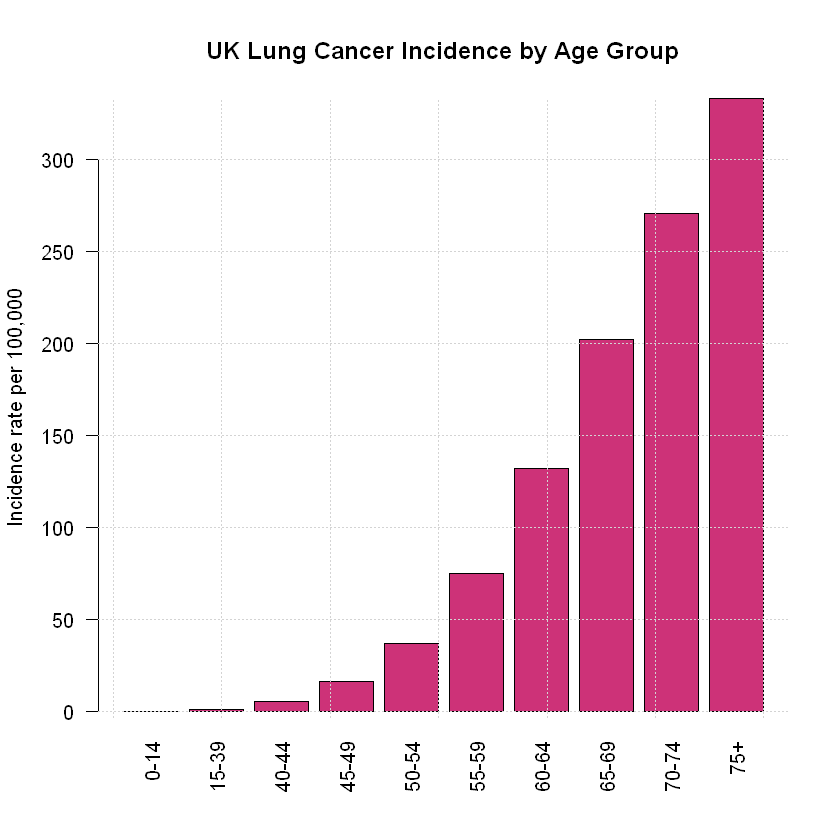

In [28]:
barplot(uk$Incidence,
        names.arg = uk$AgeClass,
        main = "UK Lung Cancer Incidence by Age Group",
        ylab = "Incidence rate per 100,000",
        col="violetred3",
        las = 2)

# In here, las means whether it is perpendicular or parallel, the labels. So either 0 or 2.

grid()

## Step 2: Find overall incidence rate distribution by country

In [30]:
aggregate(Cases ~ Country, data = lc, sum)
total <- aggregate(cbind(Cases, Population) ~ Country, data = lc, sum)

Country     Cases 
1 Austria       4576
2 China       652842
3 Ethiopia      1533
4 Georgia       1129
5 Philippines  12074
6 Singapore     1974
7 UK           40382
8 Viet Nam     21865

In [31]:
total$Incidence <- (total$Cases / total$Population) * 100000
total

Country     Cases  Population Incidence
1 Austria       4576    8455000 54.121821
2 China       652842 1355386000 48.166500
3 Ethiopia      1533   92191000  1.662852
4 Georgia       1129    4138000 27.283712
5 Philippines  12074   96017000 12.574857
6 Singapore     1974    5300093 37.244629
7 UK           40382   63573000 63.520677
8 Viet Nam     21865   90332264 24.205084

Here, it is seen that the incidence rate for e.g. UK is 63 per 100,000 people.

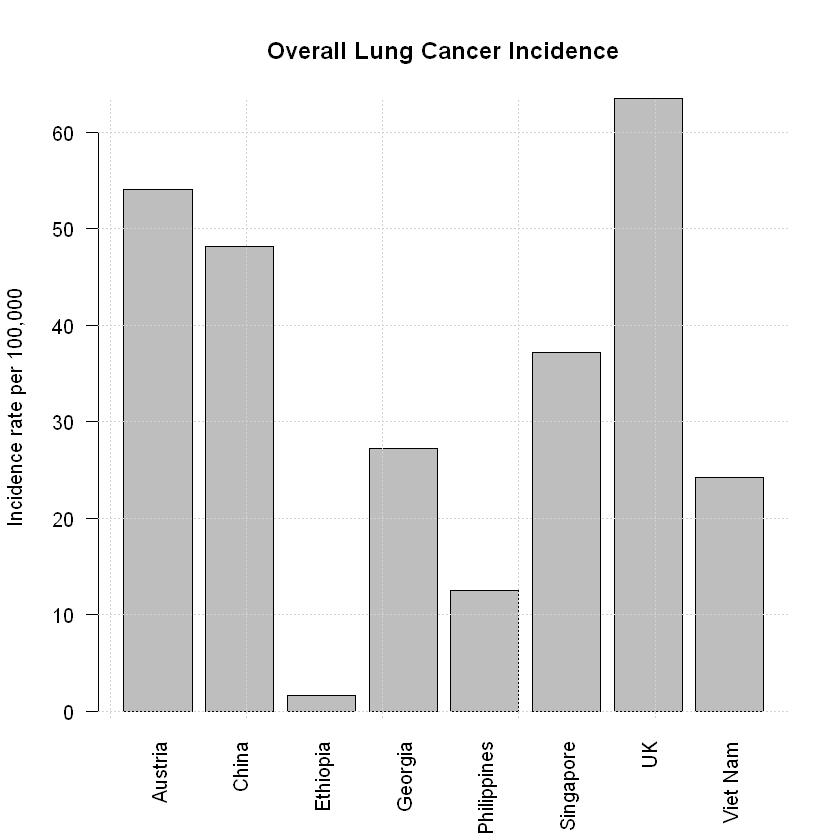

In [34]:
barplot(total$Incidence, 
        names.arg = total$Country,
        main = "Overall Lung Cancer Incidence",
        ylab = "Incidence rate per 100,000",
        las = 2)

grid()

## Step 3: Calculate what proportion of each country is in each age group

In [46]:
# CREATE A NEW COLUMN
lc[, "Proportion"] <- NA 

# GET THE COLUMN NAMES
country_names = unique(lc$Country)


for (name in country_names) {
  name <- toString(name)
  country <- name
  country_population <- sum(lc$Population[lc$Country == country])
  
  lc$Proportion[lc$Country == country] <- lc$Population[lc$Country == country] / country_population
}
head(lc)

Country  AgeClass Population Cases Proportion
1 Viet Nam 0-14     29180000     21  0.32302965
2 Viet Nam 15-39    31967459   1282  0.35388750
3 Viet Nam 40-44     6292329   1319  0.06965760
4 Viet Nam 45-49     5765012   2243  0.06382008
5 Viet Nam 50-54     5102671   2986  0.05648780
6 Viet Nam 55-59     4005732   3312  0.04434442

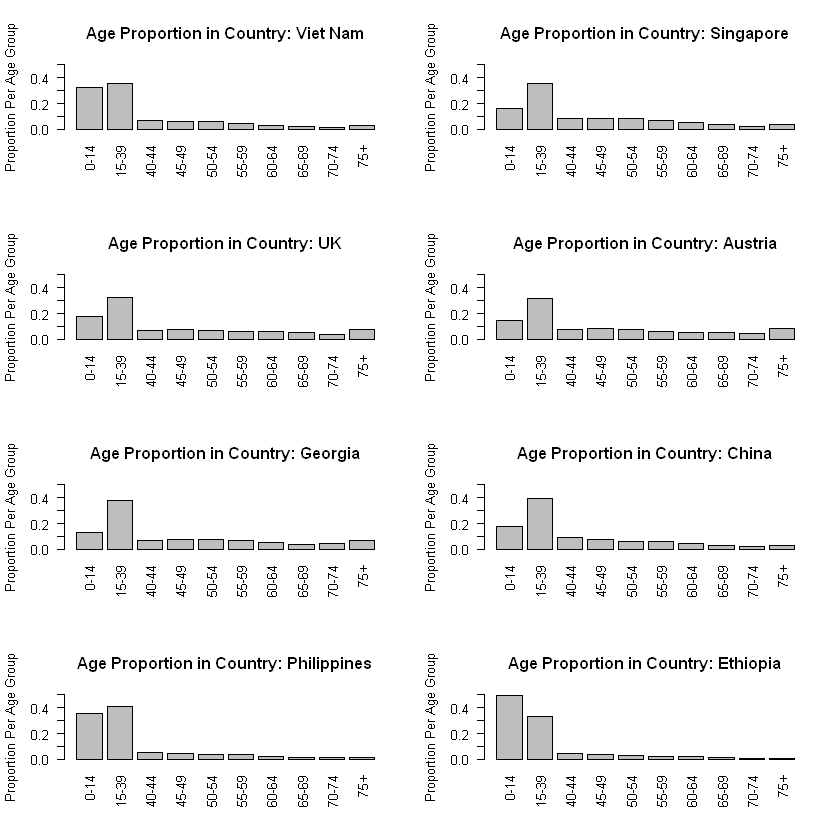

In [52]:
par(mfrow = c(4, 2)) 

for (name in country_names) {
  name <- toString(name)
  barplot(lc$Proportion[lc$Country == name],
          names.arg = lc$AgeClass[lc$Country == name],
          main = paste("Age Proportion in Country:", name),
          ylab = "Proportion Per Age Group",
          ylim = c(0.00, 0.50),
          las = 2)
}  
par(mfrow = c(1, 1)) 

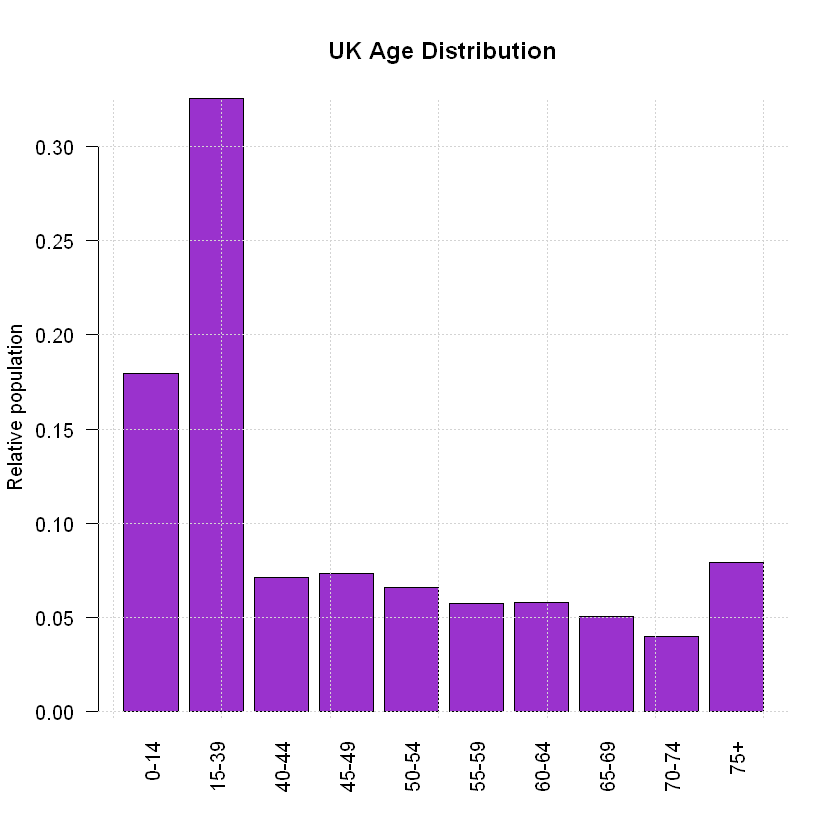

In [36]:
uk_total_population <- sum(uk$Population)

barplot(uk$Population / uk_total_population,
        names.arg = uk$AgeClass,
        main = "UK Age Distribution",
        ylab = "Relative population",
        col="darkorchid3",
        las = 2)
grid()

## Step 4: Standardize the age differences to better compare between the different countries

Age structure differs among countries, with a high percentage of older people in high income countries such as the UK and a very young population in countries like Ethiopia or even the Philippines.

You can compare the age structure of all countries in the world at https://www.populationpyramid.net/world/2012. In many countries, the population is aging while birth rates are falling. So it might be that some of the difference in total lung cancer incidence rates across countries is due to their different underlying demographic structure.

Ideally we would compute a “corrected” or “age-standardized” incidence rate that accounts for these age-specific differences in countries’ demographic structure. We’re going to use the UK as the “standard” population because it has the highest crude lung cancer incidence rate, at least for these 8 countries considered. Alternatively, if we had the data, we could use the 2012 World population for standardization.

Let’s compare two hypothetical countries A and B.

Suppose there were only two age groups and

- the incidence rates were
- low for the young group,
- high for the old group, but
- identical for both age groups in country A and country B.

If A has a higher proportion of elderly, A will have a higher overall incidence rate.

But is it a “fair” comparison between A and B?

Let's try to solve this.


## Step 5: Append a column Population_UK to the Lung Cancer data frame 

In [68]:
uk_population <- lc$Population[lc$Country == "UK"]

# Allows for the population of UK in that age group to match the age group population of the other country population respectively

lc$Population_UK <- uk_population

## Step 6: Append another column Cases_if_UK that contains the hypothetical number of cases if the country in the corresponding row had the population of the UK in this age group.

In [78]:
lc$Cases_if_UK <- (lc$Population_UK / lc$Population) * lc$Cases

# Dividing by the population of UK with the population of host country at that age group MULTIPLIED by
# number of cases in that country in that age group

head(lc, 10)

# Comparing with UK population by table

lc[21:30,]

Country  AgeClass Population Cases Proportion Population_UK Cases_if_UK
1  Viet Nam 0-14     29180000     21  0.32302965 11427668         8.224161
2  Viet Nam 15-39    31967459   1282  0.35388750 20700000       830.137922
3  Viet Nam 40-44     6292329   1319  0.06965760  4519231       947.322635
4  Viet Nam 45-49     5765012   2243  0.06382008  4652439      1810.129914
5  Viet Nam 50-54     5102671   2986  0.05648780  4201613      2458.715527
6  Viet Nam 55-59     4005732   3312  0.04434442  3637701      3007.706385
7  Viet Nam 60-64     2577193   2667  0.02853015  3685606      3814.037677
8  Viet Nam 65-69     1654129   2038  0.01831161  3219090      3966.138929
9  Viet Nam 70-74     1388447   2031  0.01537044  2516451      3681.027782
10 Viet Nam 75+       2399292   3966  0.02656074  5013201      8286.759246

Country AgeClass Population Cases Proportion Population_UK Cases_if_UK
21 UK      0-14     11427668       3 0.17975663 11427668          3      
22 UK      15-39    20700000     207 0.32560993 20700000        207      
23 UK      40-44     4519231     235 0.07108727  4519231        235      
24 UK      45-49     4652439     763 0.07318262  4652439        763      
25 UK      50-54     4201613    1563 0.06609116  4201613       1563      
26 UK      55-59     3637701    2721 0.05722085  3637701       2721      
27 UK      60-64     3685606    4865 0.05797439  3685606       4865      
28 UK      65-69     3219090    6509 0.05063612  3219090       6509      
29 UK      70-74     2516451    6807 0.03958364  2516451       6807      
30 UK      75+       5013201   16709 0.07885739  5013201      16709

## Step 7: Use the aggregate() function to calculate the total number of cases that the country would have if it had the population and age structure of the UK

In [81]:
adjusted <- aggregate(Cases_if_UK ~ Country, data = lc, sum)
adjusted

Country     Cases_if_UK
1 Austria     32421.764  
2 China       52470.825  
3 Ethiopia     3256.207  
4 Georgia     17782.716  
5 Philippines 23104.787  
6 Singapore   35290.753  
7 UK          40382.000  
8 Viet Nam    28810.200

## Step 8: Calculate the age-adjusted incidence rate

In [86]:
adjusted$Incidence <- adjusted$Cases_if_UK / sum(uk_population) * 100000
adjusted

Country     Cases_if_UK Incidence
1 Austria     32421.764   50.999267
2 China       52470.825   82.536335
3 Ethiopia     3256.207    5.121997
4 Georgia     17782.716   27.972121
5 Philippines 23104.787   36.343711
6 Singapore   35290.753   55.512171
7 UK          40382.000   63.520677
8 Viet Nam    28810.200   45.318296

## Step 9: Make a bar chart of the age-adjusted incidence rate (one bar for each country)

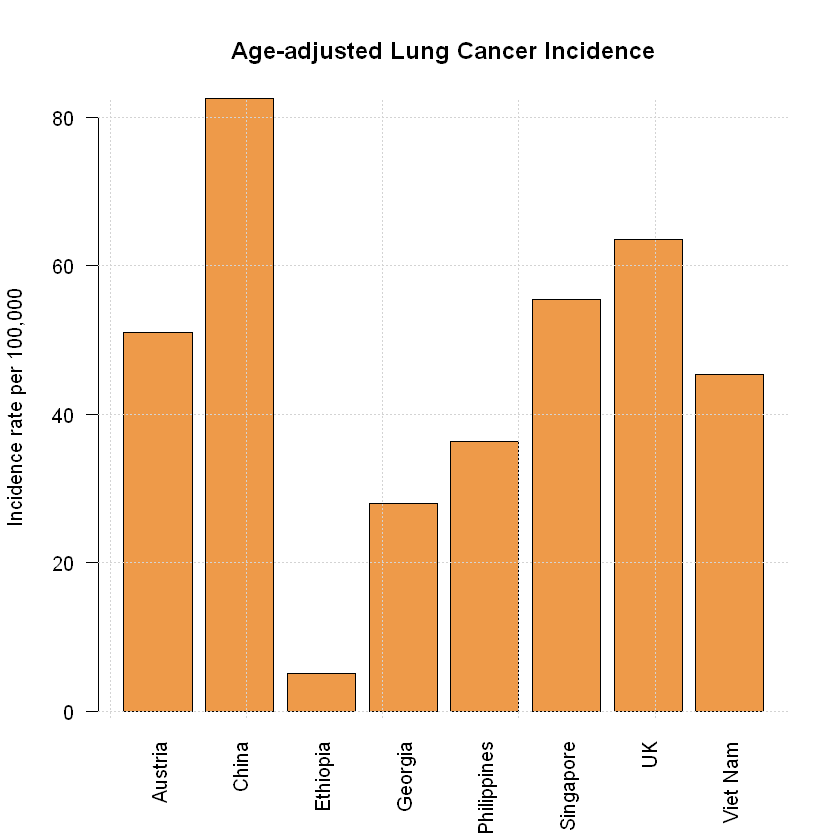

In [85]:
barplot(adjusted$Incidence, 
        names.arg = adjusted$Country,
        main = "Age-adjusted Lung Cancer Incidence", 
        ylab = "Incidence rate per 100,000",
        col="tan2", 
        las = 2)
grid()

## Step 10: Compare this plot with the bar chart for the overall (i.e. unadjusted) incidence rate that you made during the prep work for toady. Are there any noteworthy changes?

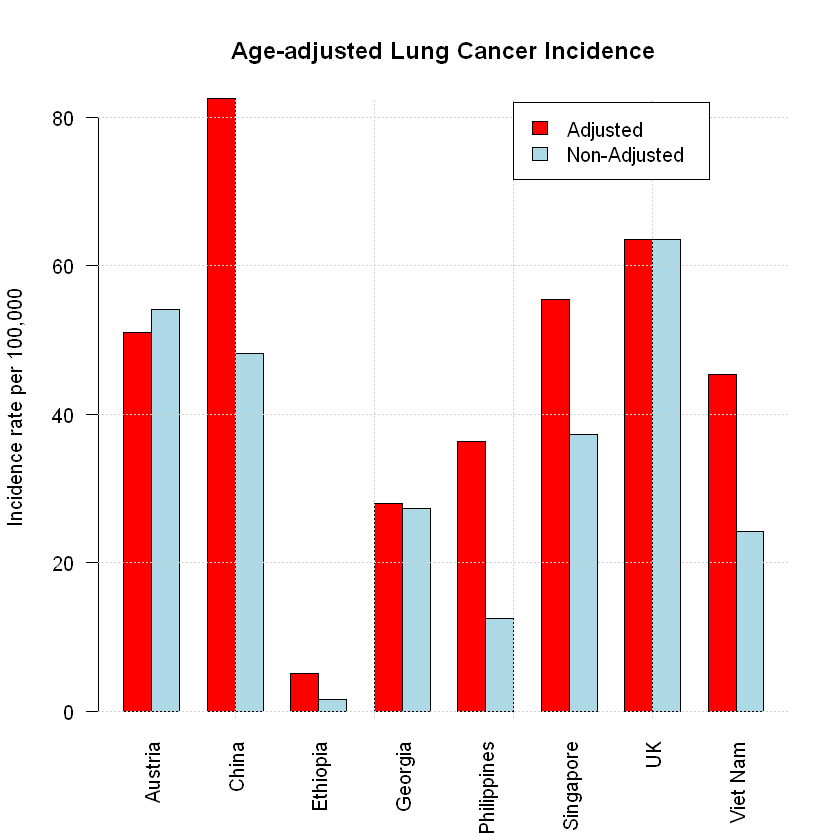

In [114]:
barplot(rbind(adjusted$Incidence, total$Incidence),
        names.arg = adjusted$Country,
        beside = TRUE,
        main = "Age-adjusted Lung Cancer Incidence", 
        ylab = "Incidence rate per 100,000",
        col= c("red", "lightblue"), 
        las = 2)
grid()

legend(15, 82, 
       legend = c("Adjusted", "Non-Adjusted"), 
       fill = c("red", "lightblue"))

## THANK YOU FOR VIEWING THIS NOTEBOOK :-)